Introduction

One of the most prominent fields of research among materials scientists is research into superconductors. Superconducting materials are extremely unique, and have a wide range of applications in engineering. When cooled below a certain temperature (the critical temperature, or Tc from here on), all electrical resistance vanishes from the material, and magnetic fields cannot penetrate the material. The implications of this are that electrical currents can travel forever inside a superconductor without growing weaker. Superconductors can also be exposed to extremely strong magnetic fields, and due to the nonexistent electrical resistance, the material will not melt.

There are numerous applications for superconductors, including MRIs, maglev trains, and much more. A classic example of the “maglev” effect is in the 2009 film “Avatar”, which shows small floating islands as the result of a maglev effect, because of the superconducting materials in the island and the magnetic field of the planet. However, superconductors are not always ideal to use. Most superconducting materials that have been developed until now need to be cooled to the temperature of liquid nitrogen before they develop superconducting properties. Finding a material that displays superconducting properties closer to room temperature would be an incredible development. In order to do this, it is necessary to understand what properties impact the Tc of a superconductor.

To learn more about superconductors:

https://home.cern/science/engineering/superconductivity 

https://www.livescience.com/superconductor 

In [1]:
# import initial packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read in data
raw_train = pd.read_csv("C:\\Users\\lumya\\CMSC320\\superconductor_train.csv")
print("train.csv shape: " + str(raw_train.shape))

raw_unique = pd.read_csv("C:\\Users\\lumya\\CMSC320\\superconductor_unique.csv")
print("unique.csv shape: " + str(raw_unique.shape))

train.csv shape: (21263, 82)
unique.csv shape: (21263, 88)


The Dataset

The dataset that I selected came in 2 parts: train.csv and unique.csv. Both contain data on 21263 superconducting materials.

train.csv has data based on 8 properties: 
1. atomic mass
2. first ionization energy (fie)
3. atomic radius
4. density
5. electron affinity
6. fusion heat
7. thermal conductivity
8. valence electrons
for each property, train.csv has the weighted (wtd) and unweighted mean, geometric mean (gmean), entropy, range, and standard deviation (std). The dataset also has the number of elements in each material, as well as the material’s Tc (in degrees Kelvin).

The second dataset, unique.csv, contains a column with the chemical formula and the Tc for each material. In addition, unique.csv contains 86 more columns corresponding to 86 different elements that appear in the chemical formulas. The data in each cell is the relative ratio of that element in the final superconducting material.
Both datasets were retrieved from Kaggle. (https://www.kaggle.com/datasets/tunguz/superconductivty-data-data-set?select=train.csv) 


In [2]:
# the columns I considered relevant to this analysis
cols = ["number_of_elements", 
        'wtd_mean_atomic_mass', 'entropy_atomic_mass', 'wtd_std_atomic_mass', 
        'wtd_mean_fie', 'entropy_fie', 'wtd_std_fie',
        'wtd_mean_atomic_radius', 'entropy_atomic_radius', 'wtd_std_atomic_radius',
        'wtd_mean_Density', 'entropy_Density', 'wtd_std_Density',
        'wtd_mean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_std_ElectronAffinity',
        'wtd_mean_FusionHeat', 'entropy_FusionHeat', 'wtd_std_FusionHeat',
        'wtd_mean_ThermalConductivity', 'entropy_ThermalConductivity', 'wtd_std_ThermalConductivity',
        'wtd_mean_Valence', 'entropy_Valence', 'wtd_std_Valence',
        'critical_temp']

# remove the column I don't want to include
idx = []
for i in range(0, len(raw_train.columns)):
    if not raw_train.columns[i] in cols:
        idx.append(i)
        
train = raw_train.drop(raw_train.columns[idx], axis = 1)

print("shape of train (DataFrame): "+ str(train.shape))
train

shape of train (DataFrame): (21263, 26)


,number_of_elements,wtd_mean_atomic_mass,entropy_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,entropy_fie,wtd_std_fie,wtd_mean_atomic_radius,entropy_atomic_radius,wtd_std_atomic_radius,...,wtd_mean_FusionHeat,entropy_FusionHeat,wtd_std_FusionHeat,wtd_mean_ThermalConductivity,entropy_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,entropy_Valence,wtd_std_Valence,critical_temp
0,4,57.862692,1.181795,53.622535,1010.268571,1.305967,355.562967,105.514286,1.259244,69.235569,...,3.846857,1.088575,4.666920,61.015189,0.308148,138.517163,2.257143,1.368922,0.437059,29.00
1,5,58.518416,1.449309,53.979870,1010.612857,1.544145,354.963511,104.971429,1.508328,68.008817,...,3.796857,1.374977,4.603000,61.372331,0.847404,139.630922,2.257143,1.557113,0.468606,26.00
2,4,57.885242,1.181795,53.656268,1010.820000,1.305967,354.804183,104.685714,1.259244,67.797712,...,3.822571,1.088575,4.649635,60.943760,0.308148,138.540613,2.271429,1.368922,0.444697,19.00
3,4,57.873967,1.181795,53.639405,1010.544286,1.305967,355.183884,105.100000,1.259244,68.521665,...,3.834714,1.088575,4.658301,60.979474,0.308148,138.528893,2.264286,1.368922,0.440952,22.00
4,4,57.840143,1.181795,53.588771,1009.717143,1.305967,356.319281,106.342857,1.259244,70.634448,...,3.871143,1.088575,4.684014,61.086617,0.308148,138.493672,2.242857,1.368922,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,53.095769,1.177145,43.202659,753.793333,1.371139,64.428777,138.244444,1.350879,35.811330,...,34.448000,1.245563,17.657417,111.537778,1.029002,46.595943,3.555556,1.377820,0.496904,2.44
21259,5,49.021367,1.323287,50.148287,989.819048,1.541006,345.450969,112.000000,1.507321,72.795212,...,4.793429,1.345508,5.204855,108.680589,0.949904,156.558695,2.047619,1.594167,0.212959,122.10
21260,2,95.609104,0.690847,5.405448,691.580000,0.688594,55.960000,192.200000,0.690022,11.600000,...,24.780000,0.665945,4.040000,57.400000,0.683870,6.800000,4.800000,0.686962,0.400000,1.98
21261,2,97.095602,0.690847,6.249958,706.969000,0.688594,64.702805,189.010000,0.690022,13.412304,...,23.669000,0.665945,4.671182,59.270000,0.683870,7.862385,4.690000,0.686962,0.462493,1.84


Data Cleaning: train.csv

While cleaning the data from train.csv, I decided not to keep all of the columns. I immediately chose to eliminate all of the unweighted property measures, as weighted values provide a more complete picture of the material. The exception to this was entropy; I used unweighted rather than weighted entropy, as unweighted entropy is easier to understand. Additionally, I removed the measurements of range and geometric mean. While the range and geometric mean of different values across a material are interesting, they are not commonly used metrics. This left the dataset with the weighted mean, entropy, and weighted standard deviation for each of the 8 properties, as well as the number of elements and the Tc, 26 columns total.


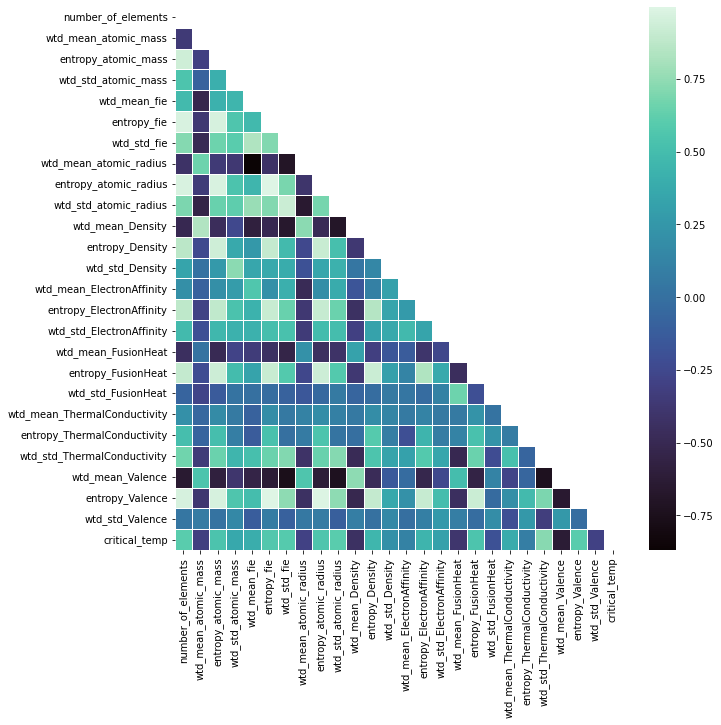

In [3]:
# create a heatmap to show correlation among the data
# mat serves as a way to cover data beyond the diagonal so we 
#    don't see the same data twice
mat = np.triu(np.ones_like(train.corr(), dtype = bool))

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train.corr(), mask = mat, linewidths = 1, cmap = "mako")
plt.show()

Exploratory Data Analysis: train.csv

I started my data exploration of train.csv by creating a heatmap of the correlation between different features. To create the heatmaps, I used seaborn’s heatmap function.

This heatmap from my train DataFrame is 26x26 squares, so the correlations are a little bit difficult to see and compare. For this reason, I separated the data into 3 categories, weighted mean, entropy, and weighted standard deviation. Each of these 3 smaller heatmaps also contained the number of elements and the Tc columns.


In [4]:
# columns containing wieghted mean of properties
small_cols = ["number_of_elements", 
        'wtd_mean_atomic_mass',  
        'wtd_mean_fie', 
        'wtd_mean_atomic_radius', 
        'wtd_mean_Density', 
        'wtd_mean_ElectronAffinity', 
        'wtd_mean_FusionHeat', 
        'wtd_mean_ThermalConductivity', 
        'wtd_mean_Valence', 
        'critical_temp']

small_idx = []
for i in range(0, len(train.columns)):
    if not train.columns[i] in small_cols:
        small_idx.append(i)
        
small_train_mean = train.drop(train.columns[small_idx], axis = 1)

print(small_train_mean.shape)
# small_train

(21263, 10)


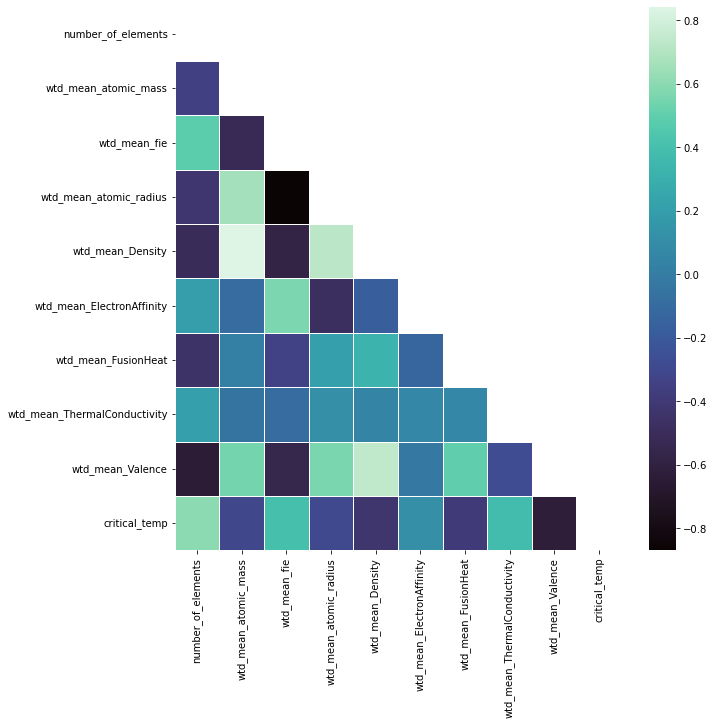

In [5]:
# heatmap of this subset of property data
small_mat = np.triu(np.ones_like(small_train_mean.corr(), dtype = bool))

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(small_train_mean.corr(), mask = small_mat, linewidths = 1, cmap = "mako")
plt.show()

(21263, 10)


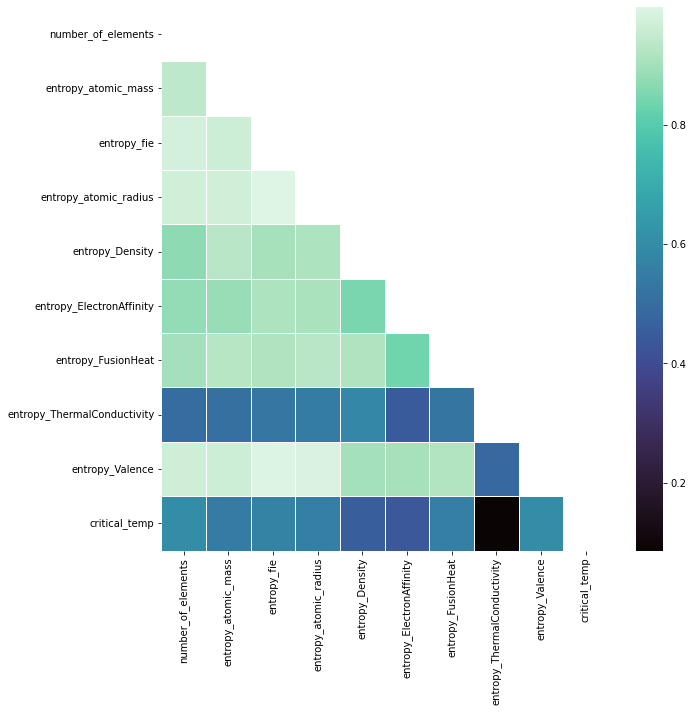

In [6]:
# heatmap of second subset of property data
small_cols = ["number_of_elements", 
        'entropy_atomic_mass',  
        'entropy_fie', 
        'entropy_atomic_radius', 
        'entropy_Density', 
        'entropy_ElectronAffinity', 
        'entropy_FusionHeat', 
        'entropy_ThermalConductivity', 
        'entropy_Valence', 
        'critical_temp']

small_idx = []
for i in range(0, len(train.columns)):
    if not train.columns[i] in small_cols:
        small_idx.append(i)
        
small_train_ent = train.drop(train.columns[small_idx], axis = 1)

print(small_train_ent.shape)
# small_train

small_mat = np.triu(np.ones_like(small_train_ent.corr(), dtype = bool))

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(small_train_ent.corr(), mask = small_mat, linewidths = 1, cmap = "mako")
plt.show()

(21263, 10)


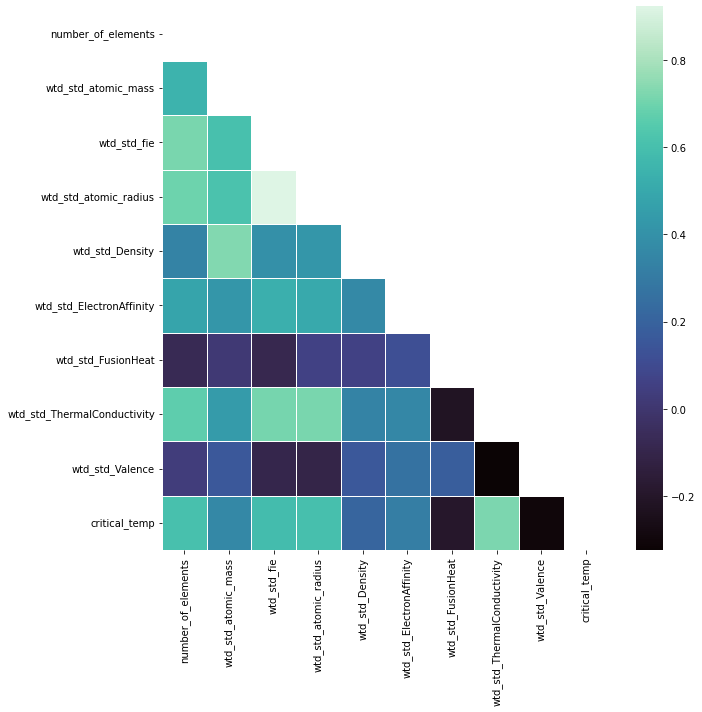

In [7]:
# heatmap of third subset of property data
small_cols = ["number_of_elements", 
        'wtd_std_atomic_mass',  
        'wtd_std_fie', 
        'wtd_std_atomic_radius', 
        'wtd_std_Density', 
        'wtd_std_ElectronAffinity', 
        'wtd_std_FusionHeat', 
        'wtd_std_ThermalConductivity', 
        'wtd_std_Valence', 
        'critical_temp']

small_idx = []
for i in range(0, len(train.columns)):
    if not train.columns[i] in small_cols:
        small_idx.append(i)
        
small_train_std = train.drop(train.columns[small_idx], axis = 1)

print(small_train_std.shape)
# small_train

small_mat = np.triu(np.ones_like(small_train_std.corr(), dtype = bool))

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(small_train_std.corr(), mask = small_mat, linewidths = 1, cmap = "mako")
plt.show()

From the 4 heatmaps, I wanted to determine which of the features had the strongest correlation with Tc. The strongest correlations that I observed were:
number of elements
1. Thermal Conductivity, weighted standard deviation
2. Thermal Conductivity, weighted mean
3. atomic mass, entropy
4. first ionization energy, entropy, 
5. first ionization energy, weighted standard deviation
6. atomic radius, weighted standard deviation
7. valence electrons, weighted standard deviation
in no particular order.


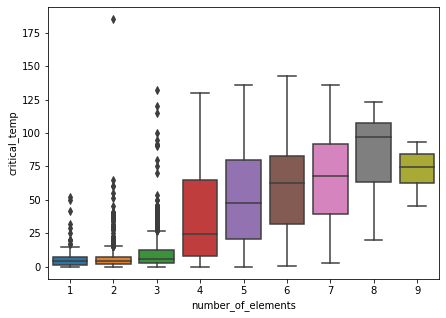

In [8]:
# boxplot of number of elements vs critical temp
fig, ax = plt.subplots(figsize = (7,5))
sns.boxplot(data = train, x = "number_of_elements", y = "critical_temp", ax = ax)
plt.show()

I decided to explore the correlations between the Tc and some of the above properties. The first property I selected was the number of elements. Since these are discrete values, I decided to create a boxplot using seaborn. This plot clearly shows the correlation between the two variables, as the number of elements increases, so does the Tc.

For properties of standard deviation of valence electrons, weighted standard deviation and weighted mean of thermal conductivity, and entropy of first ionization energy, I created scatter plots with regression lines.

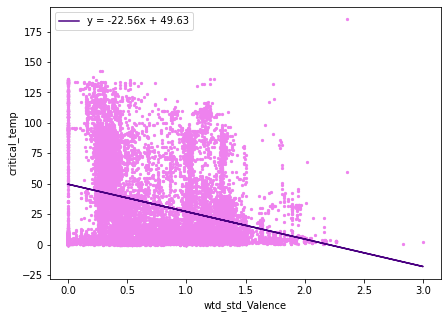

In [9]:
# scatter plot of critcal temp vs. wtd_std_Valence with regression line
fig, ax = plt.subplots(figsize = (7,5))

plt.xlabel("wtd_std_Valence")
plt.ylabel("critical_temp")

f = np.polyfit(train["wtd_std_Valence"], train["critical_temp"], 1)
f_eq = f[0] * train["wtd_std_Valence"] + f[1]
plt.scatter(train["wtd_std_Valence"], train["critical_temp"], s = 5, color = "violet")
plt.plot(train["wtd_std_Valence"], f_eq, alpha = 1, color = "indigo", 
         label = "y = " + str(round(f[0], 2)) + "x + " + str(round(f[1], 2)))
plt.legend()
plt.show()

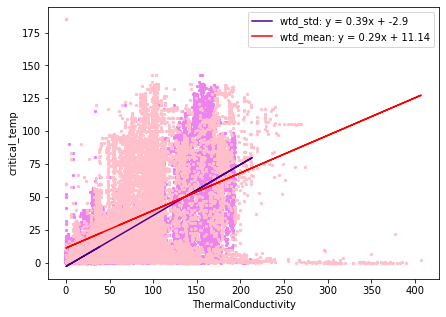

In [10]:
# scatter plot of critical temp vs. wtd_std_ThermalConductivity and wtd_mean_ThermalConductivity
#    with 2 regression lines

fig, ax = plt.subplots(figsize = (7,5))

plt.xlabel("ThermalConductivity")
plt.ylabel("critical_temp")

f = np.polyfit(train["wtd_std_ThermalConductivity"], train["critical_temp"], 1)
f_eq = f[0] * train["wtd_std_ThermalConductivity"] + f[1]
plt.scatter(train["wtd_std_ThermalConductivity"], train["critical_temp"], s = 5, color = "violet")
plt.plot(train["wtd_std_ThermalConductivity"], f_eq, alpha = 1, color = "indigo", 
         label = "wtd_std: y = " + str(round(f[0], 2)) + "x + " + str(round(f[1], 2)))

f = np.polyfit(train["wtd_mean_ThermalConductivity"], train["critical_temp"], 1)
f_eq = f[0] * train["wtd_mean_ThermalConductivity"] + f[1]
plt.scatter(train["wtd_mean_ThermalConductivity"], train["critical_temp"], s = 5, color = "pink")
plt.plot(train["wtd_mean_ThermalConductivity"], f_eq, alpha = 1, color = "red", 
         label = "wtd_mean: y = " + str(round(f[0], 2)) + "x + " + str(round(f[1], 2)))

plt.legend()
plt.show()

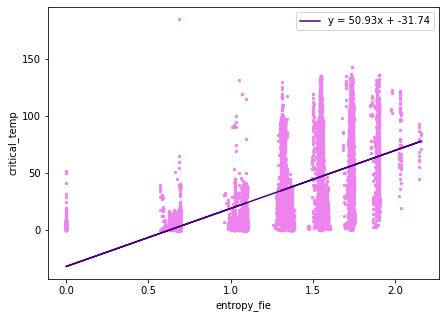

In [11]:
# scatter plot of critical temp vs. entropy_fie with regression line

fig, ax = plt.subplots(figsize = (7,5))

plt.xlabel("entropy_fie")
plt.ylabel("critical_temp")

f = np.polyfit(train["entropy_fie"], train["critical_temp"], 1)
f_eq = f[0] * train["entropy_fie"] + f[1]
plt.scatter(train["entropy_fie"], train["critical_temp"], s = 5, color = "violet")
plt.plot(train["entropy_fie"], f_eq, alpha = 1, color = "indigo", 
         label = "y = " + str(round(f[0], 2)) + "x + " + str(round(f[1], 2)))
plt.legend()
plt.show()

Data Cleaning and Exploratory Analysis: unique.csv

In [12]:
mats = raw_unique[["material", "critical_temp"]]
raw_unique.drop(columns = ["material", "critical_temp"], axis = 1, inplace = True)

print("columns in unique.csv: ")
print(raw_unique.columns)
print("unique.csv shape: " + str(raw_unique.shape))

columns in unique.csv: 
Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At',
       'Rn'],
      dtype='object')
unique.csv shape: (21263, 86)


In order to reduce the sheer size of this dataset, I decided to alter the nature of the dataset. Rather than have each entry describe the ratio of each element in the material, I decided to change it to a 0 if the element was not present in the material, 1 if the element was present. This step was very similar to “one-hot-encoding” each element. 

Next, I took the sum of each element’s column to determine how many materials each element appeared in. If any element appeared in less than 2% of entries I removed it from the DataFrame. I made this decision because there would be enough data to determine the impact on Tc of an element that appeared so few times. I used the elements that I eliminated to create another DataFrame containing rare elements. This step left me with one DataFrame containing more common elements, and a second one containing the rarer elements.

In [13]:
# one hot encode raw_unique
raw_unique = raw_unique.astype(bool).astype(int)
# print(raw_unique)

# find the number of occurrences of each element
sums = raw_unique.sum(axis = 'rows', numeric_only = True)

rar = []
comm = []
reg = []
# categorize elements
for i in range(0, len(sums)-1):
    if sums[i] < 425: # appears in <2% of entries
        rar.append(i)
    elif sums[i] > 20625: # appears in >97% of entries
        # this actually never happens
        comm.append(i)
    else:
        reg.append(i)

# unique has elements that ocurr regularly, rare has elements that appear in <2% 
#    of the data
unique = raw_unique.drop(raw_unique.columns[rar + comm], axis = 1)
rare = raw_unique.drop(raw_unique.columns[reg + comm], axis = 1)
# print(unique.shape)

unique["critical_temp"], unique["material"] = mats["critical_temp"], mats["material"]
rare["critical_temp"], rare["material"] = mats["critical_temp"], mats["material"]

print("rare elements: ")
print(rare.columns)

print("common elements: ")
print(unique.columns)

# mean temperature
mn = unique["critical_temp"].mean()

rare elements: 
Index(['H', 'He', 'Li', 'Be', 'N', 'Ne', 'Na', 'P', 'Cl', 'Ar', 'Sc', 'Cr',
       'Mn', 'Br', 'Kr', 'Rb', 'Tc', 'Ag', 'Cd', 'Sb', 'I', 'Xe', 'Cs', 'Pm',
       'Eu', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re',
       'Os', 'Pt', 'Au', 'Po', 'At', 'Rn', 'critical_temp', 'material'],
      dtype='object')
common elements: 
Index(['B', 'C', 'O', 'F', 'Mg', 'Al', 'Si', 'S', 'K', 'Ca', 'Ti', 'V', 'Fe',
       'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Sr', 'Y', 'Zr', 'Nb',
       'Mo', 'Ru', 'Rh', 'Pd', 'In', 'Sn', 'Te', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Gd', 'Ir', 'Hg', 'Tl', 'Pb', 'Bi', 'Rn', 'critical_temp',
       'material'],
      dtype='object')


I created 2 more boxplots to illustrate the range temperatures for the superconducting materials that each element was part of. The first boxplot is for the more common elements, and the second is for the rarer elements. Each boxplot has a red line at the mean Tc.
Both boxplots show that there are some elements that are part of superconducting materials that tend to have very low Tc’s, while some elements can create a very wide range of Tc’s.


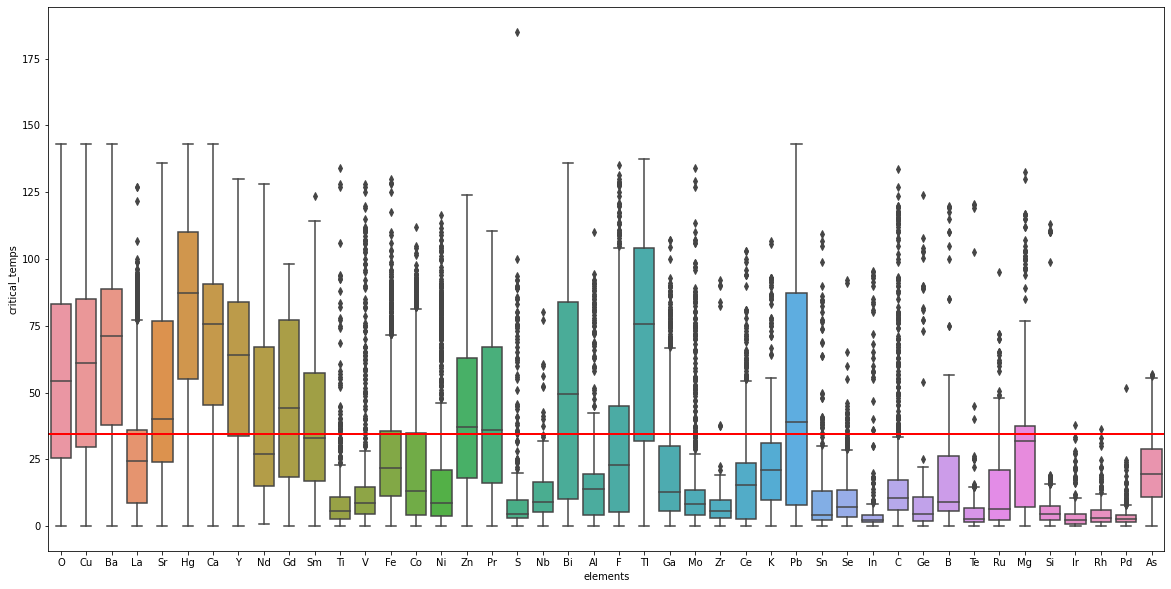

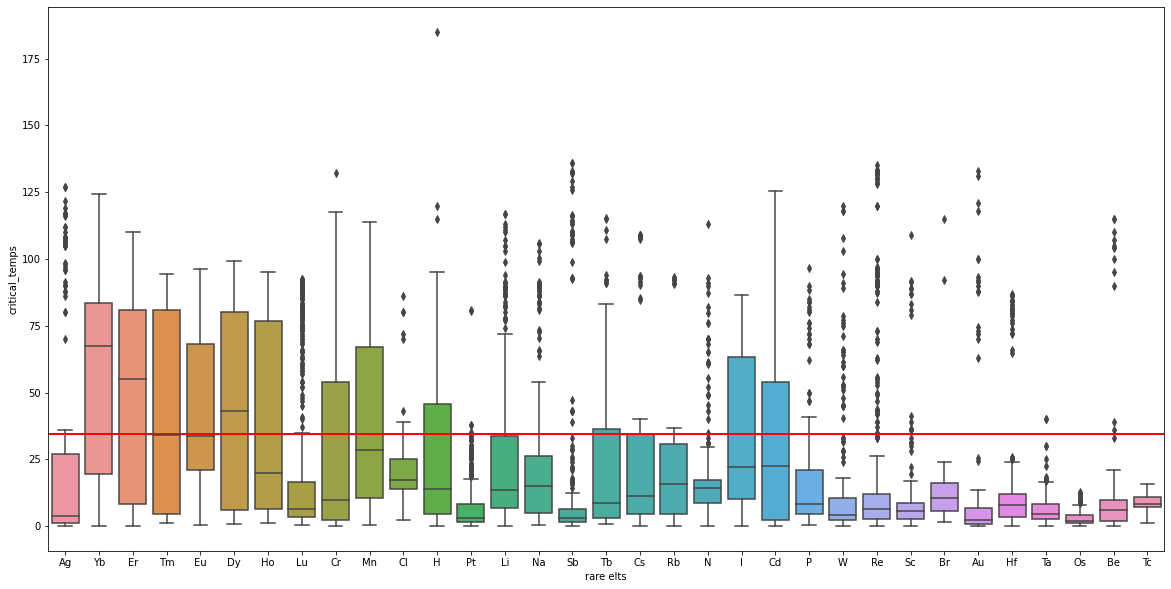

In [14]:
# create boxplots showing critical temperature range for the superconductors that 
#    each element appears in
def boxp(df, col_title):
    col_l = list(df.columns)
    col_l = col_l[0:len(col_l)-2]

    elts = []
    temps = []

    for index, row in df.iterrows():
        for c in col_l:
            if row[c] != 0:
                elts.append(c)
                temps.append(row["critical_temp"])
            
    # compress data into a DataFrame with 2 columns
    elt_temp_df = pd.DataFrame(list(zip(elts, temps)), columns = [col_title, "critical_temps"])

    fig1, ax1 = plt.subplots(figsize = (20, 10))
    sns.boxplot(data = elt_temp_df, x = col_title, y = "critical_temps", ax = ax1)
    # display mean temp on graph
    ax1.axhline(mn, color="red", linewidth=2)
    plt.show()
    return(elt_temp_df)

elt_temp_df = boxp(unique, "elements")
relt_temp_df = boxp(rare, "rare elts")

Modeling The Data

The ultimate goal for this project is to build the best possible regression model to predict the Tc of a given superconducting material given a set of its properties. In order to do this, we have to determine which properties and which modeling method gives the best result. I decided to model the data using 3 types of regression models:
1. Linear Regression
2. Random Forest Regression
3. K-Nearest Neighbor Regression


I also decided to model several subsets of the data to help find the relative importance of various features. 

(a) The first dataset was a combination of the one-hot-encoded common elements and the features I selected from train.csv

(b) The second subset was just the selected data from train.csv

(c) The third subset was just the one-hot-encoded element data

(d) The final subset was a set of selected features based on properties that had a strong correlation to Tc from the heatmaps, and the elements that demonstrated a significant variance from the mean Tc

I also decided to try and measure the relative importance of different measures of the properties I selected from train.csv. As I stated above, I created my DataFrame from train.csv using the weighted mean, entropy, and weighted standard deviation of the 8 properties measured. Mean is generally a measure of the center of the data, entropy is a measure of disorder, and standard deviation is a measure of variance. In order to test which type of measurement was most beneficial to predicting the Tc of a superconductor, I created a model for Tc vs. each subset of properties.

In total, I created 21 models, and reported the average score for each model after using 9-fold cross validation.

In [15]:
# merge train and unique DataFrames into total
u2 = unique.drop(columns = ["critical_temp"], axis = 1)
total = pd.concat([u2, train], axis = 1)
print("total shape: " + str(total.shape))
print("total columns: ")
print(total.columns)

total shape: (21263, 72)
total columns: 
Index(['B', 'C', 'O', 'F', 'Mg', 'Al', 'Si', 'S', 'K', 'Ca', 'Ti', 'V', 'Fe',
       'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Sr', 'Y', 'Zr', 'Nb',
       'Mo', 'Ru', 'Rh', 'Pd', 'In', 'Sn', 'Te', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Gd', 'Ir', 'Hg', 'Tl', 'Pb', 'Bi', 'Rn', 'material',
       'number_of_elements', 'wtd_mean_atomic_mass', 'entropy_atomic_mass',
       'wtd_std_atomic_mass', 'wtd_mean_fie', 'entropy_fie', 'wtd_std_fie',
       'wtd_mean_atomic_radius', 'entropy_atomic_radius',
       'wtd_std_atomic_radius', 'wtd_mean_Density', 'entropy_Density',
       'wtd_std_Density', 'wtd_mean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_std_ElectronAffinity',
       'wtd_mean_FusionHeat', 'entropy_FusionHeat', 'wtd_std_FusionHeat',
       'wtd_mean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'wtd_mean_Valence', 'entropy_Valence',
       'wtd_std_Valence', 'critical_t

In [16]:
# import some machine learning packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [17]:
'''function to fit models print score after 9 fold cross validation
    Parameters:
    df: DataFrame containing data
    model_type: regression model
    properties: anything from df that must be dropped to make x
    target: regression prediction target'''
def reg_model(df, model_type, properties, target):
    x = df.drop(columns = properties, axis = 1)
    y = df[target]

    model = model_type
    model.fit(x, y)
    score = cross_val_score(model, x, y, cv = 9)
    print(score.mean())
    

In [18]:
# target variable
t = "critical_temp"

# selected properties based on exploratory analysis
sel_prop = ['number_of_elements', 'wtd_std_ThermalConductivity', 'wtd_mean_ThermalConductivity', 
      'entropy_atomic_mass', 'entropy_fie', 'wtd_std_fie', 'wtd_std_atomic_radius', 
      'entropy_Valence', 'B', 'C', 'O', 'F', 'Al', 'Si', 'S', 'K', 'Ca', 'Ti', 'V', 'Fe',
       'Co', 'Ni', 'Cu', 'Ga', 'Ge', 'As', 'Se', 'Y', 'Zr', 'Nb',
       'Mo', 'Ru', 'Rh', 'Pd', 'In', 'Sn', 'Te', 'Ba', 'La', 'Ce',
       'Gd', 'Ir', 'Hg', 'Tl', 'Bi', 'Rn']

drop_prop = []
for p in total.columns:
    if not p in sel_prop:
        drop_prop.append(p)
        
# evaluate models from 4 subsets of total
print("Linear Regression\n")
print("All Features: ")
reg_model(total, LinearRegression(), ["critical_temp", "material"], t)

print("Elements only:")
reg_model(unique, LinearRegression(), ["critical_temp", "material"], t)

print("Properties only:")
reg_model(train, LinearRegression(), ["critical_temp"], t)

print("Selected Features: ")
reg_model(total, LinearRegression(), drop_prop, t)



Linear Regression

All Features: 
0.25532879763093885
Elements only:
0.22898719968972855
Properties only:
-0.11489912972002086
Selected Features: 
0.19906669074827704


In [19]:
# evaluate models based on different summary statistics of material properties
print("Mean Properties: ")
reg_model(small_train_mean, LinearRegression(), ["critical_temp"], t)

print("Entropy of Properties: ")
reg_model(small_train_ent, LinearRegression(), ["critical_temp"], t)

print("Standard Deviation of Properties: ")
reg_model(small_train_std, LinearRegression(), ["critical_temp"], t)

Mean Properties: 
-0.49178881563567267
Entropy of Properties: 
-0.5374819755892891
Standard Deviation of Properties: 
-0.18502315831109042


Out of all the models, the Linear Regression model consistently scored the lowest. However, this is not surprising; each Linear Regression model had anywhere between 8 and 71 predictors, so each model was quite complex. It is very possible that this data required a more complex model than Linear Regression could produce. However, we can still gain some useful insights from the scores of each model. Most notably, the models built using data subsets (a), (b), and (d) had very close scores, while the model built from subset (d) had a much lower score by comparison. This implies that the properties of the superconducting material alone do not have a strong enough relation to Tc to make a good prediction of Tc. The next 3 Linear Regression models, using weighted mean, entropy, and weighted standard deviation metrics also scored very low. However, considering that we have established that properties alone are not enough to make a good Linear Regression model to predict Tc, these low values make sense.


In [20]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# same categories as before
print("Random Forest Regression\n")
print("All Features: ")
reg_model(total, RandomForestRegressor(max_depth = 3), ["critical_temp", "material"], "critical_temp")

print("Elements Only: ")
reg_model(unique, RandomForestRegressor(max_depth = 3), ["critical_temp", "material"], "critical_temp")

Random Forest Regression

All Features: 
0.23977271703323064
Elements Only: 
0.3675263984622754


In [21]:
print("Properties Only: ")
reg_model(train, RandomForestRegressor(max_depth = 3), ["critical_temp"], "critical_temp")

print("Selected Features: ")
reg_model(total, RandomForestRegressor(max_depth = 3), drop_prop, "critical_temp")

Properties Only: 
0.22835207439225705
Selected Features: 
0.3451689617007514


In [22]:
# Randon Forest Regression for summary statistics of material properties
print("Mean Properties: ")
reg_model(small_train_mean, RandomForestRegressor(max_depth = 3), ["critical_temp"], t)

print("Entropy of Properties: ")
reg_model(small_train_ent, RandomForestRegressor(max_depth = 3), ["critical_temp"], t)

print("Standard Deviation of Properties: ")
reg_model(small_train_std, RandomForestRegressor(max_depth = 3), ["critical_temp"], t)

Mean Properties: 
0.21835824095348094
Entropy of Properties: 
-0.08991576706108317
Standard Deviation of Properties: 
0.12658460454817513


The next model type was a Random Forest Regression (RFR) model. Once again, none of the models scored particularly well, but the results are an improvement from the Linear Regression model. In this case, data subsets (a) and (c) did not perform as well as (b) and (d). Once again, this makes sense in context. Subset (a) has a lot of features to consider, and RFR models have a tendency to overfit to training data. It is possible that the models created were overfit due to a large amount of data, and the result was a poor RFR model. The poor performance of subset (c) lines up with the observation from the Linear Regression model; properties alone are not enough to make a good model to predict Tc. Similarly, the subsets of the measured properties did not score well either. In this case, entropy scored particularly low, and weighted mean scored the highest. Entropy had the lowest score in the Linear Regression model as well, suggesting that the disorder in property values is not a useful metric for determining the Tc.


In [23]:
# K Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor

print("KNN Regression\n")
print("All Features:")
reg_model(total, KNeighborsRegressor(n_neighbors = 5), ["critical_temp", "material"], "critical_temp")

print("Elements Only: ")
reg_model(unique, KNeighborsRegressor(n_neighbors = 5), ["critical_temp", "material"], "critical_temp")

print("Properties Only: ")
reg_model(train, KNeighborsRegressor(n_neighbors = 5), ["critical_temp"], "critical_temp")

print("Selected Features: ")
reg_model(total, KNeighborsRegressor(n_neighbors = 5), drop_prop, "critical_temp")

KNN Regression

All Features:
0.48580846833923513
Elements Only: 
0.5797367340434231
Properties Only: 
0.48518019689663344
Selected Features: 
0.5903268316889545


In [24]:
print("Mean Properties: ")
reg_model(small_train_mean, KNeighborsRegressor(n_neighbors = 5), ["critical_temp"], t)

print("Entropy of Properties: ")
reg_model(small_train_ent, KNeighborsRegressor(n_neighbors = 5), ["critical_temp"], t)

print("Standard Deviation of Properties: ")
reg_model(small_train_std, KNeighborsRegressor(n_neighbors = 5), ["critical_temp"], t)

Mean Properties: 
0.3926756547339589
Entropy of Properties: 
0.45154119614906185
Standard Deviation of Properties: 
0.47970127766373355


The final model I used was a K-Nearest Neighbor Regression (KNNR) model. The scores for this model were consistently the highest out of any of the models. Similarly to the RFR model, subsets (a) and (c) generated scores in the same range, and (b) and (d) scored higher, also in the same range. Once again, subset (a) likely contained too many predictors to make a relevant model, and the material properties once again make poor predictors by themselves. The scores for subsets of properties were different than before. In this case, weighted mean was the lowest, and entropy and weighted standard deviation were very close, with weighted standard deviation ultimately being the highest.


Insights Gained

Ultimately, the KNNR model yielded the highest scores consistently. For this type and volume of data, it is reasonable that the KNNR algorithm would work well to make predictions. The Linear Regression model is too simple, while RFR can easily become over or underfit. 

Additionally, these models demonstrated that there are properties that are more important in predicting the Tc of a superconducting material than others. From heatmaps, we were able to estimate which material properties had the strongest correlation with Tc, and we could select those properties as good features to use in a model. Additionally, we were able to select elements that were present in semiconductors with a more extreme temperature range, or a temperature range that differed from the mean. These elements were also selected as good features for a model. In all 3 model types, the model created using subset (d), the subset that contained the features we predicted would be most useful, was shown to be a decent model. Relative to the other subsets, subset (d) performed quite well.

Also worth noting is that subset (a) only performed well relative to the others in the Linear Regression model. In every other case, using all of the data did not yield as good a model as using only the elements data, (c), or the selected features, (d). Models created using only the material properties, (b), consistently performed worse relative to the other subsets, which suggests that material properties alone are not enough to create a good model for predicting the Tc of a superconductor. This is a reasonable result, as it suggests that the actual elemental composition of the superconductor must carry some weight in making a prediction about Tc. Each element is distinct, particularly in the way elements interact with current and magnetic fields. Therefore, summary statistics of material properties simply don’t contain enough information to be good predictors.
Unfortunately, analysis of the relevance of the different subsets of the summary statistics of properties, (weighted mean, entropy, weighted standard deviation) were inconclusive. Each model type showed a different statistic ranking high, so for now we can assume that the most relevant statistic is dependent on the regression model used.

Conclusion

This project allowed us to determine which properties about a superconducting material are most useful in predicting the Tc of the superconductor, and in turn which properties may have the greatest impact on the Tc. Ideally, this information could be used to determine which properties to focus on in research to find superconductors with higher Tc’s.

Acknowledgements

These datasets were initially used by Kam Hamidieh from the University of Pennsylvania’s Statistics Department to create a prediction model for the Tc of superconductors. The original paper can be found here.

